torch.Size([2000])
torch.Size([1, 3])
Result: y: 0.05747686326503754 + -0.5339853763580322x+ 0.47415250539779663x^2+ 0.47415250539779663x^3
network structure 
 Sequential(
  (0): Linear(in_features=3, out_features=1, bias=True)
  (1): Flatten(start_dim=0, end_dim=1)
)


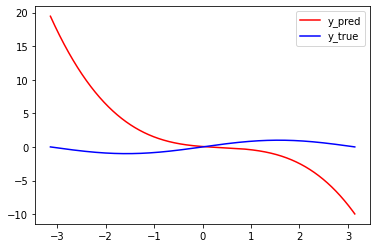

In [2]:
'''
Using Sequential module from torch.nn package to define the structure of our model. The model is than called as funtion recieving input.
'''
from torch.nn.modules.linear import Linear
import sys
import matplotlib.pyplot as plt
import torch 
import math 
import numpy as np
np.set_printoptions(threshold=sys.maxsize)
device = torch.device("cpu")
dtype = torch.float32

x = torch.linspace(-math.pi , math.pi ,2000,device=device,dtype=dtype)#input
y = torch.sin(x)#true output

#input to network is xx= x+x**2+x**3
p =torch.tensor([1,2,3]) #tensor[[1,2,3]]
xx = x.unsqueeze(-1).pow(p) #first col is x, 2nd col is x^2, 3rd col is x^3

#Define structure of network
model = torch.nn.Sequential(
    torch.nn.Linear(3,1), #provide a linear output for input y = x(w.T)+bias
    torch.nn.Flatten(0,1) #flatten the input , output of linear is 2000,1, to match it to y dimensions we flatten it so output is (1,2000)
)

loss_ = torch.nn.MSELoss(reduction = 'sum')
lr = 5e-6
optimizer = torch.optim.RMSprop(model.parameters(),lr=lr)
for i in range(2000):
  y_pred = model(xx)
  loss = loss_(y_pred,y)
  optimizer.zero_grad() #make gradients zero
  loss.backward()
  optimizer.step() #upate weights and biases

      
linear__=model[0]#(xx)
print(y_pred.shape)
#print(linear__.detach().numpy())

print(linear__.weight.shape)
print(f'Result: y: {linear__.bias.item()} + {linear__.weight[:,0].item()}x+ {linear__.weight[:,1].item()}x^2+ {linear__.weight[:,1].item()}x^3')


plt.figure()

plt.plot(x,y_pred.detach().numpy(), color = 'r', label='y_pred')
plt.plot(x,y.detach().numpy(), color = 'b',label='y_true')
plt.legend()
print('network structure \n',model)